In [1]:
import numpy as np
import pywt
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('G:\\celebrity image classification\\dataset\\hamed_behdad\\1hhsl582mpkuh6019o5d-32.jpg')
img.shape

(500, 500, 3)

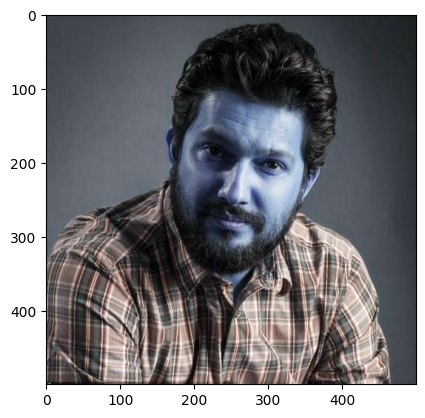

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 500)

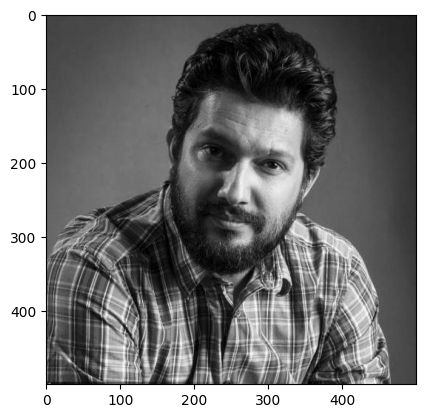

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('G:\\celebrity image classification\\haarcascades\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('G:\\celebrity image classification\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[162, 118, 207, 207]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(162, 118, 207, 207)

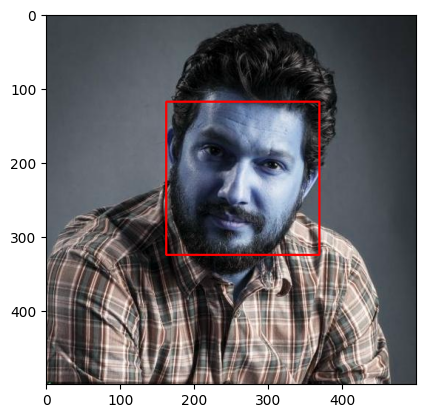

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

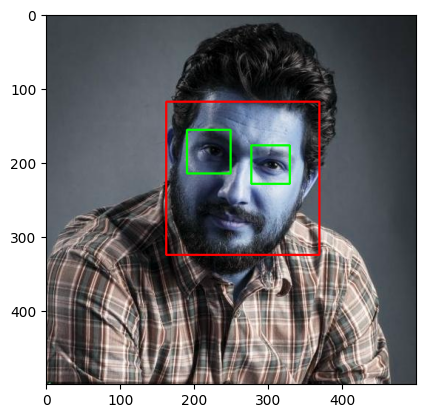

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            try:
                if len(eyes) >= 2:
                    return roi_color
            except:
                return None


TypeError: Image data of dtype object cannot be converted to float

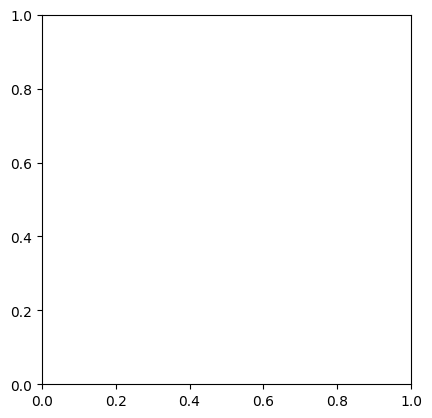

In [14]:
orginal_image = cv2.imread('G:\\celebrity image classification\\dataset\\elnaz_shakerdost\\10-13-2022-4-41-49-PM.jpg')
plt.imshow(orginal_image)

In [15]:
cropped_image = get_cropped_image_if_2_eyes('G:\\celebrity image classification\\dataset\\elnaz_shakerdost\\10-13-2022-4-41-49-PM.jpg')
plt.imshow(cropped_image)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [16]:
path_to_data = 'G:\\celebrity image classification\\dataset'
path_to_cr_data = 'G:\\celebrity image classification\\dataset\\cropped\\'

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['G:\\celebrity image classification\\dataset\\cropped',
 'G:\\celebrity image classification\\dataset\\hamed_behdad',
 'G:\\celebrity image classification\\dataset\\leila_otadi',
 'G:\\celebrity image classification\\dataset\\mohsen_tanabandeh',
 'G:\\celebrity image classification\\dataset\\tannaz_tabatabai']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)
img_dirs

['G:\\celebrity image classification\\dataset\\cropped',
 'G:\\celebrity image classification\\dataset\\hamed_behdad',
 'G:\\celebrity image classification\\dataset\\leila_otadi',
 'G:\\celebrity image classification\\dataset\\mohsen_tanabandeh',
 'G:\\celebrity image classification\\dataset\\tannaz_tabatabai']

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("\\")[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except:
            roi_color= None
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '\\' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
celebrity_file_names_dict

{'cropped': [],
 'hamed_behdad': ['G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad1.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad2.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad3.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad4.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad5.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad6.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad7.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad8.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad9.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad10.png',
  'G:\\celebrity image classification\\dataset\\cropped\\

In [27]:
def w2d(img, mode='haar', level=1):
    imarray = img # datatype conversions
    imarray = cv2.cvtColor(imarray, cv2.COLOR_RGB2GRAY) # convert to gray
    imarray = np.float32(imarray) # convert to float
    imarray /= 255;
    coefs = pywt.wavedec2(imarray, mode, level=level) # compute coefficients
    
    coefs_h = list(coefs)
    coefs_h[0] *= 0; # process coefficients
    
    # reconstruction
    imarray_h = pywt.waverec2(coefs_h, mode);
    imarray_h *=255;
    imarray_h = np.uint8(imarray_h)
    
    return imarray_h

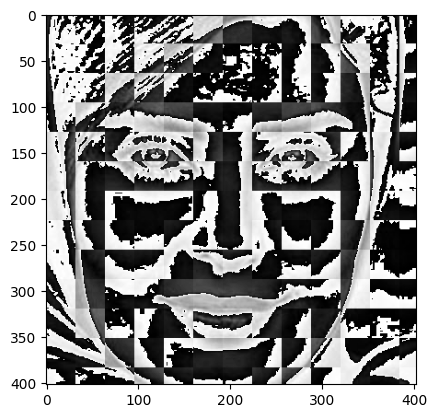

In [259]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [28]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'hamed_behdad': ['G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad1.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad10.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad11.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad12.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad13.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad14.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad15.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad16.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad17.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_behdad\\hamed_behdad18.png',
  'G:\\celebrity image classification\\dataset\\cropped\\hamed_be

In [29]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count +1
class_dict

{'hamed_behdad': 0,
 'leila_otadi': 1,
 'mohsen_tanabandeh': 2,
 'tannaz_tabatabai': 3}

In [40]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)

        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_image = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_image)
        y.append(class_dict[celebrity_name])

(4096, 1)

In [43]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(80, 4096)

In [45]:
32*32*3+32*32

4096

In [264]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [266]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= 'rbf', C= 10))])

In [267]:
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.75

In [268]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.57      0.80      0.67         5
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         4

    accuracy                           0.75        16
   macro avg       0.81      0.78      0.76        16
weighted avg       0.82      0.75      0.75        16



In [269]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [270]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [271]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.782051,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.519231,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.767949,{'logisticregression__C': 1}


In [273]:
best_estimators['svm'].score(x_test,y_test)

0.875

In [274]:
best_estimators['svm'].score(x_test,y_test)

0.875

In [275]:
best_clf = best_estimators['svm']
w_clf = best_estimators['svm']

In [276]:
from sklearn.metrics import confusion_matrix
cd = confusion_matrix(y_test, w_clf.predict(x_test))
cd

array([[4, 0, 1, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 0],
       [0, 1, 0, 3]], dtype=int64)

In [277]:
best_clf.predict

array([[4, 0, 1, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 0],
       [0, 1, 0, 3]], dtype=int64)

<Axes: >

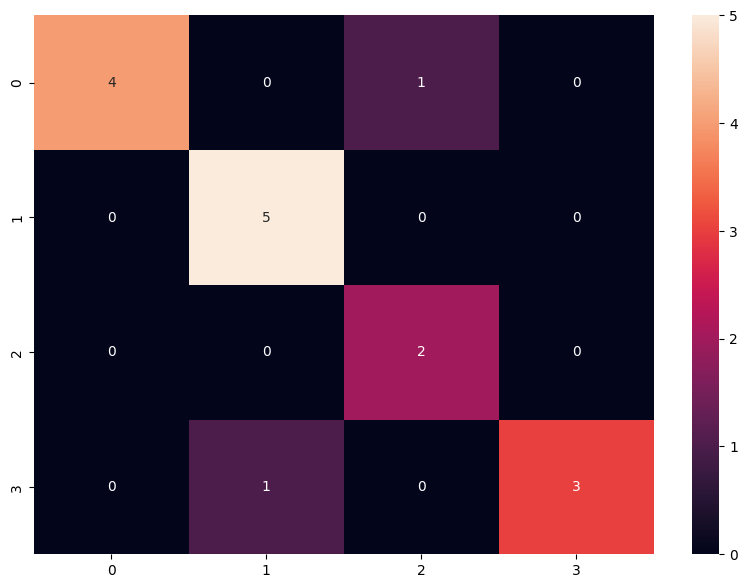

In [278]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True)

<Axes: >

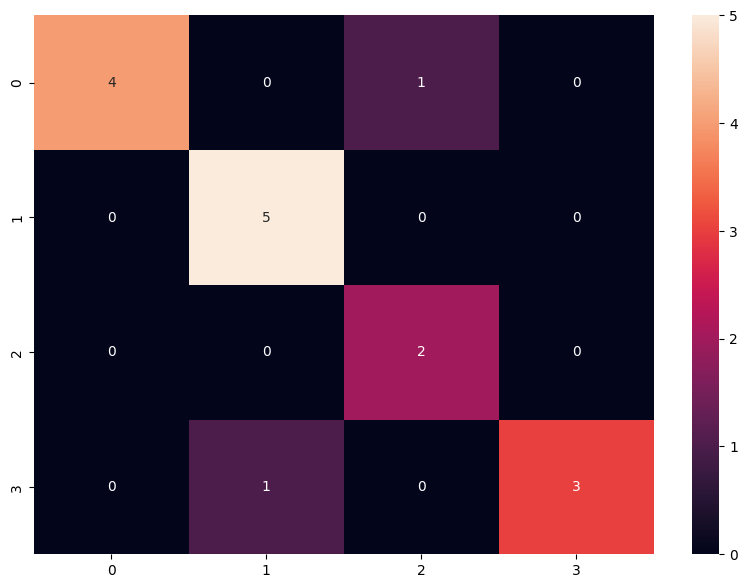

In [279]:
plt.figure(figsize= (10,7))
sn.heatmap(cd, annot=True)

In [2]:
import joblib
joblib.dump(best_clf, 'saved_model_per.pkl')

NameError: name 'best_clf' is not defined

In [283]:
import json
with open('class_dictionary_per.json','w') as f:
    f.write(json.dumps(class_dict))